In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure all columns are displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [48]:
# Read the data
df = pd.read_csv('../data/2015-street-tree-census-tree-data.csv')

In [49]:
df.shape

(683788, 45)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [51]:
df.describe(include='all')

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788,683788.000000,683788.000000,683788,683788,652172,652169,652169,164350,79866,652172,683788,225844,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788.000000,683788,683788.000000,683788.000000,683788,683788.000000,683788.000000,683788.000000,683788,683788,6.837880e+05,683788,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
unique,NaN,NaN,483,NaN,NaN,2,3,3,132,132,3,3,2,3,231,2,2,2,2,2,2,2,2,2,408701,NaN,48,NaN,NaN,5,NaN,NaN,NaN,188,188,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2015-10-27T00:00:00.000,NaN,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,1or2,Helpful,NoDamage,TreesCount Staff,Stones,No,No,No,No,No,No,No,No,No,106 CROSS BAY BOULEVARD,NaN,Brooklyn,NaN,NaN,Queens,NaN,NaN,NaN,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,NaN,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6852,NaN,NaN,656896,652173,528850,87014,87014,143557,51866,464978,296284,95673,543789,680252,653466,670514,682757,651215,621423,683377,659433,262,NaN,177300,NaN,NaN,250551,NaN,NaN,NaN,12969,12969,NaN,683788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365205.011085,313793.096236,NaN,11.279787,0.432463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10916.246044,NaN,343.505404,3.358500,NaN,29.943181,50.791583,20.615781,NaN,NaN,3.404914e+06,NaN,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,NaN,8.723042,3.290241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651.553364,NaN,115.740601,1.166746,NaN,14.328531,18.966520,7.390844,NaN,NaN,1.175863e+06,NaN,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,NaN,101.000000,1.000000,NaN,1.000000,23.000000,10.000000,NaN,NaN,1.000201e+06,NaN,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10451.000000,NaN,302.000000,3.000000,NaN,19.000000,33.000000,14.000000,NaN,NaN,3.011700e+06,NaN,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,NaN,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11214.000000,NaN,402.000000,4.000000,NaN,30.000000,52.000000,21.000000,NaN,NaN,4.008100e+06,NaN,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,NaN,16.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11365.000000,NaN,412.000000,4.000000,NaN,43.000000,64.000000,25.000000,NaN,NaN,4.103202e+06,NaN,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09


In [52]:
# Missing values analysis
print("\n=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
missing_df[missing_df['Missing Values'] > 0]


=== Missing Values Analysis ===


,Missing Values,Percentage
health,31616,4.623655
spc_latin,31619,4.624094
spc_common,31619,4.624094
steward,519438,75.964773
guards,603922,88.320064
sidewalk,31616,4.623655
problems,457944,66.971634
council district,6519,0.953366
census tract,6519,0.953366
bin,9559,1.397948


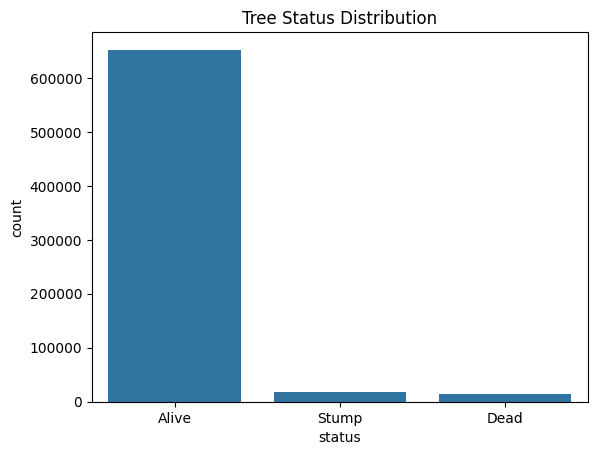

In [53]:
# Tree status distribution
sns.countplot(data=df, x='status')
plt.title('Tree Status Distribution')
plt.show()

1. **"Alive"** trees dominate the dataset, making up the vast majority.
2. **"Stump"** and **"Dead"** trees are present but make up only a small fraction.

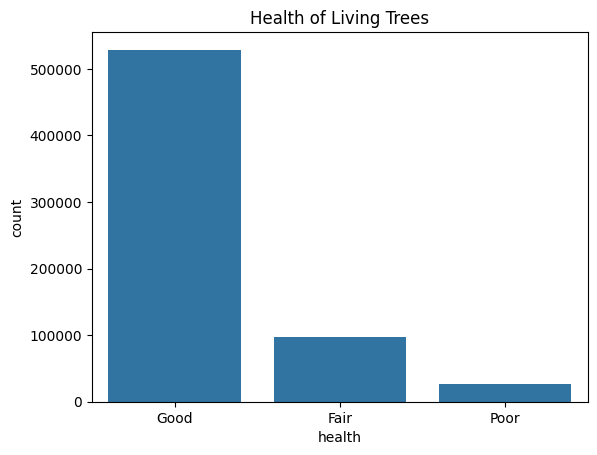

In [54]:
# Health distribution for living trees
living_trees = df[df['status'] == 'Alive']
sns.countplot(data=living_trees, x='health', order=['Good', 'Fair', 'Poor'])
plt.title('Health of Living Trees')
plt.show()

1. **Good** health dominates the dataset — more than 500,000 trees.
2. **Fair** health is significantly lower (~100,000).
3. **Poor** health is a small minority (~30,000 or fewer).
4. The dataset is heavily skewed toward **"Good"** health

In [59]:
df['spc_common'].value_counts(normalize=True)

spc_common
London planetree          0.133422
honeylocust               0.098539
Callery pear              0.090362
pin oak                   0.081551
Norway maple              0.052424
littleleaf linden         0.045605
cherry                    0.044895
Japanese zelkova          0.044863
ginkgo                    0.032237
Sophora                   0.029652
red maple                 0.026444
green ash                 0.024918
American linden           0.020746
silver maple              0.018825
sweetgum                  0.016341
northern red oak          0.012880
silver linden             0.012259
American elm              0.012228
maple                     0.010856
purple-leaf plum          0.010548
swamp white oak           0.010117
crimson king maple        0.009082
Chinese elm               0.008196
'Schubert' chokecherry    0.007495
Japanese tree lilac       0.007004
eastern redbud            0.005828
golden raintree           0.005703
crab apple                0.005408
Kentucky 

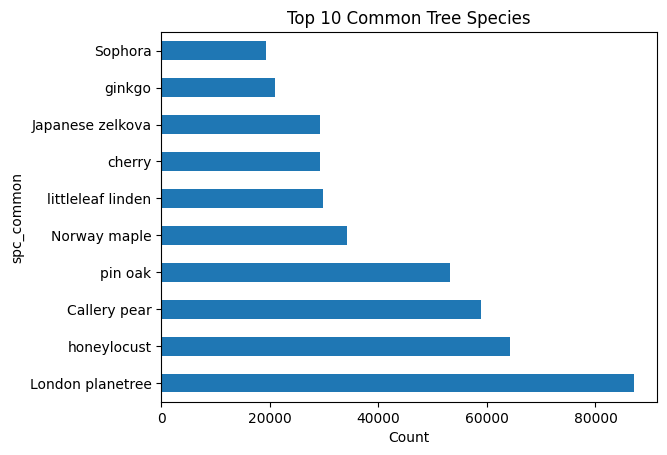

spc_common
London planetree     0.133422
honeylocust          0.098539
Callery pear         0.090362
pin oak              0.081551
Norway maple         0.052424
littleleaf linden    0.045605
cherry               0.044895
Japanese zelkova     0.044863
ginkgo               0.032237
Sophora              0.029652
Name: proportion, dtype: float64


In [56]:
# Top 10 most common species
top_species = df['spc_common'].value_counts().head(10)
top_species.plot(kind='barh')
plt.title('Top 10 Common Tree Species')
plt.xlabel('Count')
plt.show()

# Proportion of each species
species_props = df['spc_common'].value_counts(normalize=True)[:10]
print(species_props)

1. **~65%** of all trees are from just 10 species.
2. **London planetree** alone makes up 13% — a dominant species in NYC.

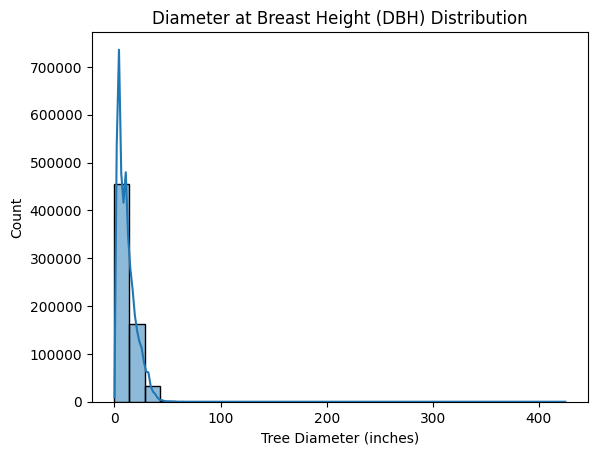

In [11]:
# Histogram of tree diameters (only living trees)
sns.histplot(living_trees['tree_dbh'], bins=30, kde=True)
plt.title('Diameter at Breast Height (DBH) Distribution')
plt.xlabel('Tree Diameter (inches)')
plt.show()

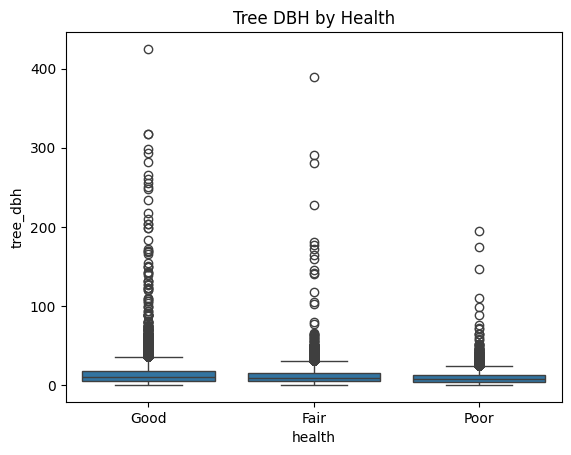

In [12]:
# Boxplot of DBH by health
sns.boxplot(data=living_trees, x='health', y='tree_dbh', order=['Good', 'Fair', 'Poor'])
plt.title('Tree DBH by Health')
plt.show()

1. **"Good"** health trees generally have slightly higher **DBH** than **"Fair"** or **"Poor"**.
2. **"Poor"** health trees have:
    * Lower median DBH
    * Narrower IQR (interquartile range)
    * Fewer large trees
3. All classes have a long right tail → some trees with very large DBH (>100 inches), considered outliers.

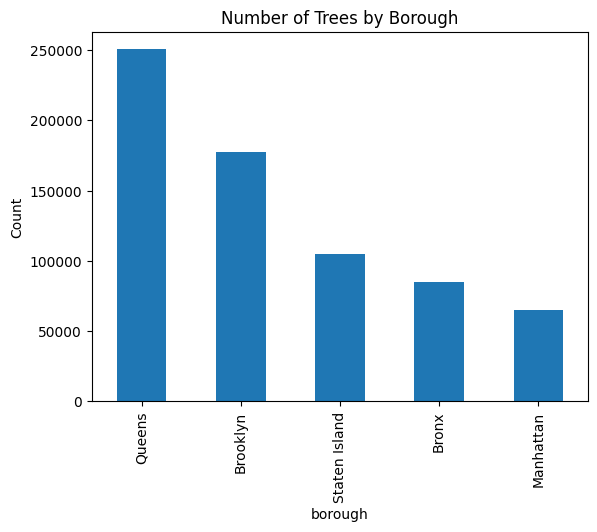

In [38]:
# Trees by borough
df['borough'].value_counts().plot(kind='bar')
plt.title('Number of Trees by Borough')
plt.ylabel('Count')
plt.show()

1. **Queens** and **Brooklyn** are NYC's largest boroughs by land area and residential zones → more room for street trees.
2. **Manhattan**, being denser and more urbanized, naturally has fewer trees per block.

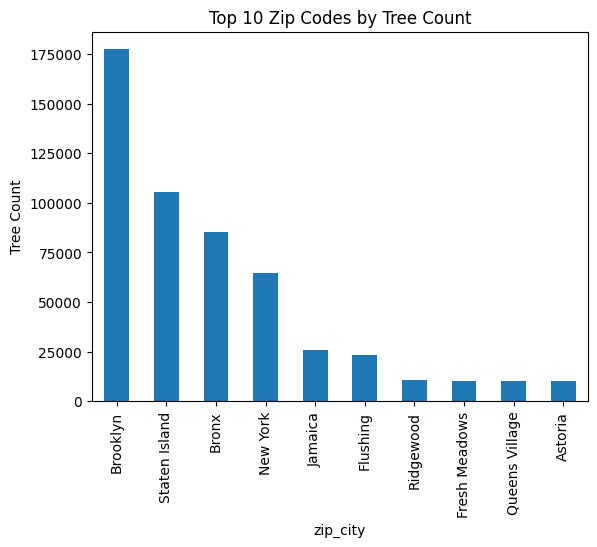

In [39]:
# Trees by zipcode (top 10)
df['zip_city'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Zip Codes by Tree Count')
plt.ylabel('Tree Count')
plt.show()

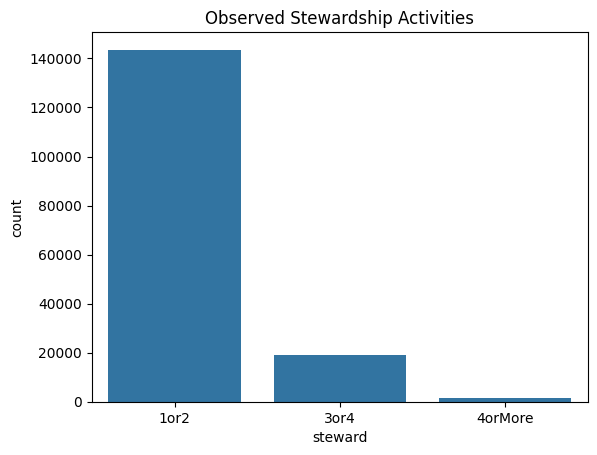

In [42]:
# Stewardship frequency
sns.countplot(data=living_trees, x='steward', order=['1or2', '3or4', '4orMore'])
plt.title('Observed Stewardship Activities')
plt.show()

1. **"1or2"** stewardship signs is by far the most common (over 140,000 cases).
2. **"3or4"** is much less common (~20,000).
3. **"4orMore"** is rare.

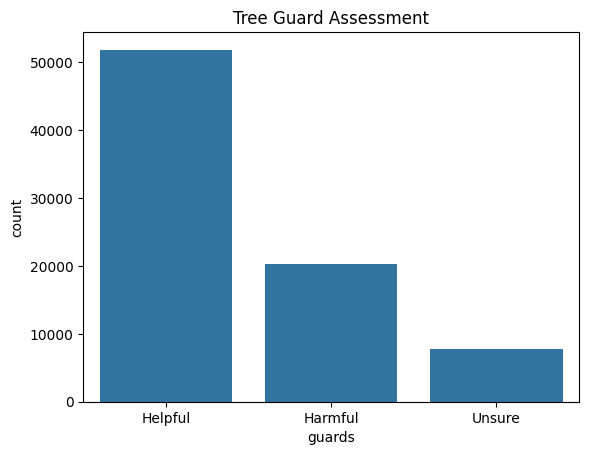

In [43]:
# Tree guards
sns.countplot(data=living_trees, x='guards', order=['Helpful', 'Harmful', 'Unsure'])
plt.title('Tree Guard Assessment')
plt.show()

1. **Helpful** guards are most common (~52,000 trees)
2. **Harmful** guards still appear frequently (~20,000 trees)
3. **Unsure** assessments are relatively low (~8,000)
4. Total coverage is low

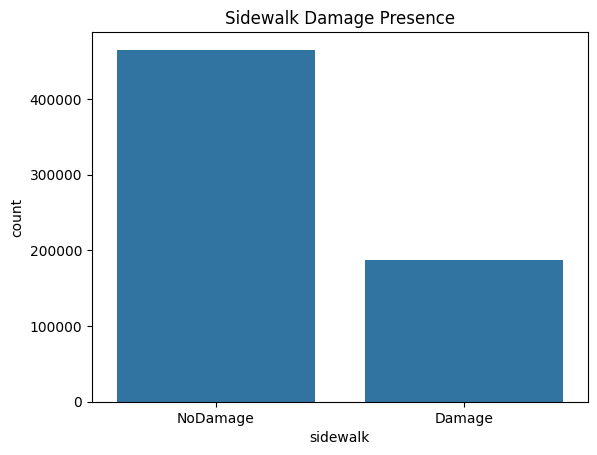

In [44]:
# Sidewalk damage
sns.countplot(data=living_trees, x='sidewalk')
plt.title('Sidewalk Damage Presence')
plt.show()

1. **NoDamage**: ~450,000+ trees
2. **Damage**: ~190,000+ trees
3. approximately 30–35% of trees are next to a damaged sidewalk.

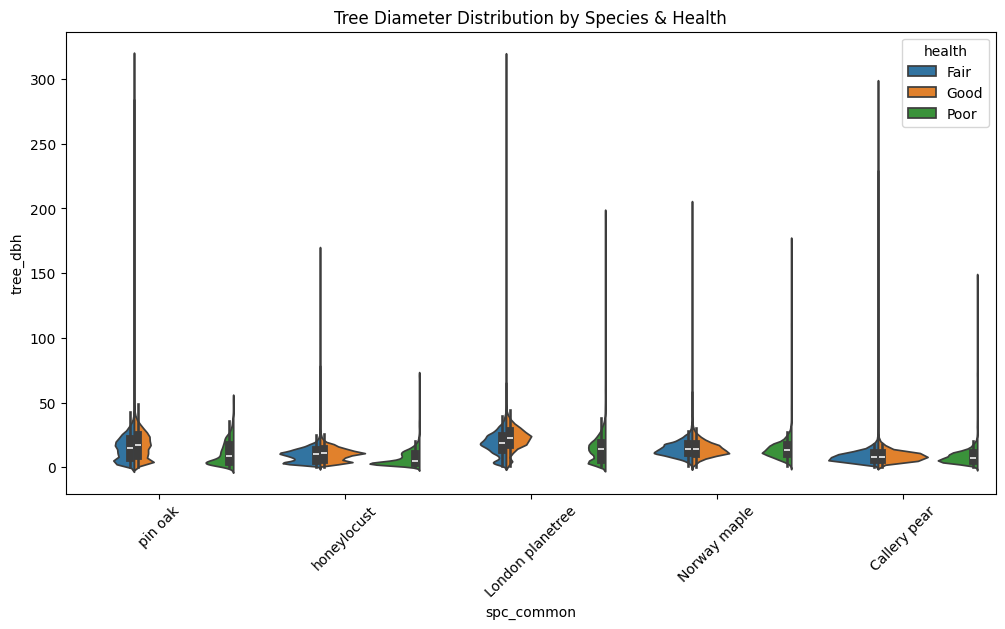

In [15]:
# Filter to top species
top_species_list = df['spc_common'].value_counts().head(5).index
filtered = df[(df['spc_common'].isin(top_species_list)) & (df['status'] == 'Alive')]

# Violin plot for size distribution by species and health
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered, x='spc_common', y='tree_dbh', hue='health', split=True)
plt.title('Tree Diameter Distribution by Species & Health')
plt.xticks(rotation=45)
plt.show()

Top 5 most common species:
Pin oak, Honeylocust, London planetree, Norway maple, Callery pear
1. Pin Oak
    * Strong skew toward larger DBH
    * Poor health trees tend to have lower diameters, but there are exceptions
    * Clear stratification: good health spans across a wide DBH range, poor is concentrated below ~20
2. Honeylocust:
    * Narrower DBH range overall
    * "Poor" trees mostly have very low DBH — likely younger, struggling trees
    * "Good" health dominates across the board
3. London Planetree:
    * Wide DBH distribution — includes very mature trees
    * Fairly healthy overall, though “Poor” trees cluster around small/medium DBH
    * This species handles urban stress well — may explain performance
4. Norway Maple:
    * Moderate size trees
    * “Fair” and “Poor” trees have noticeably smaller DBH than “Good”
    * Looks sensitive to environmental stress or age-related decline
5. Callery Pear:
    * Compact tree species (lower DBH ceiling)
    * “Poor” health mostly tied to young trees
    * Health improves with maturity (as DBH increases)

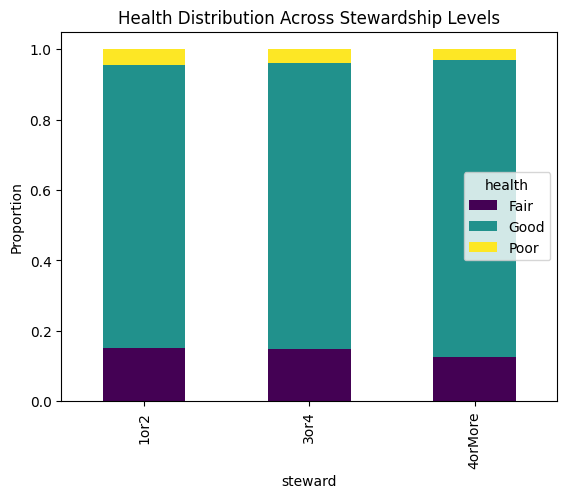

In [16]:
# Only living trees
df_alive = df[df['status'] == 'Alive']

# Crosstab: Stewardship vs Health
steward_vs_health = pd.crosstab(df_alive['steward'], df_alive['health'], normalize='index')
steward_vs_health.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Health Distribution Across Stewardship Levels')
plt.ylabel('Proportion')
plt.show()

1. All stewardship levels (1or2, 3or4, 4orMore) show a high proportion of "Good" health trees — roughly 80%+
2. As the stewardship level increases, the proportion of:
    * "Good" health slightly increases
    * "Poor" health slightly decreases

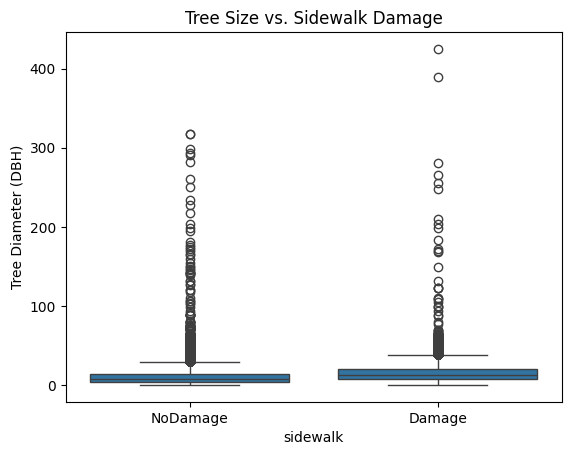

In [45]:
# Boxplot of DBH by sidewalk damage
sns.boxplot(data=df_alive[df_alive['sidewalk'].notna()], x='sidewalk', y='tree_dbh')
plt.title('Tree Size vs. Sidewalk Damage')
plt.ylabel('Tree Diameter (DBH)')
plt.show()

1. Trees associated with sidewalk damage tend to have a slightly higher DBH on average than those without damage.
2. The median diameter is higher in the “Damage” group.
3. There are more extreme outliers (very large DBH trees) in the “Damage” category.
4. The interquartile range (IQR) is also wider for “Damage” trees, indicating more variability in size.
5. bBigger trees with more established root systems exert more pressure on nearby infrastructure.

In [19]:
# Find unusually large trees
large_trees = df_alive[df_alive['tree_dbh'] > df_alive['tree_dbh'].quantile(0.99)]
print("Unusually large trees (top 1% DBH):")
large_trees[['spc_common', 'tree_dbh', 'borough']].head()


Unusually large trees (top 1% DBH):


,spc_common,tree_dbh,borough
83,London planetree,42,Queens
96,London planetree,38,Queens
304,silver maple,39,Brooklyn
314,silver maple,39,Queens
483,honeylocust,38,Queens


In [24]:
# Rare species
rare_species = df['spc_common'].value_counts()
print("Species with < 50 occurrences:")
print(rare_species[rare_species < 50])

Species with < 50 occurrences:
spc_common
European alder    47
American larch    46
black pine        37
pitch pine        33
Osage-orange      29
Scots pine        25
Virginia pine     10
Name: count, dtype: int64


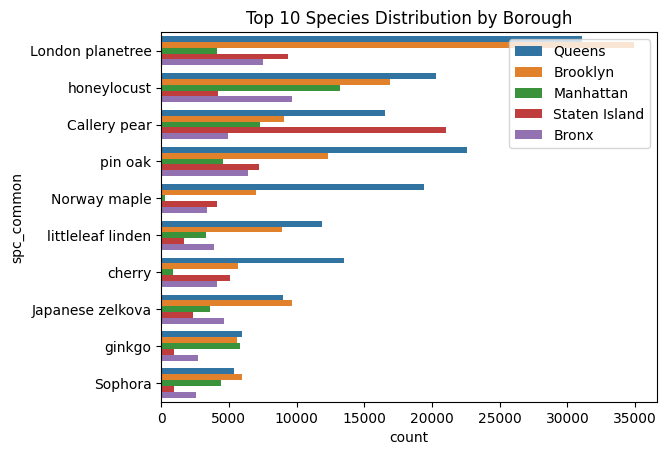

In [25]:
sns.countplot(data=df[df['status'] == 'Alive'], 
              y='spc_common', 
              hue='borough', 
              order=df['spc_common'].value_counts().head(10).index)
plt.title('Top 10 Species Distribution by Borough')
plt.legend(loc='upper right')
plt.show()

1. Queens consistently dominates tree counts across nearly all species.
2. Brooklyn often ranks second but has notable variation by species.
3. Manhattan has lower counts, which aligns with its dense infrastructure.
4. Staten Island and Bronx have selective dominance with certain species.

C:\Users\IlyaPastushkov\AppData\Local\Temp\ipykernel_2664\3103102193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alive['dbh_bin'] = pd.cut(df_alive['tree_dbh'], bins=[0, 6, 12, 24, 36, 60, 100], labels=['0-6', '7-12', '13-24', '25-36', '37-60', '60+'])


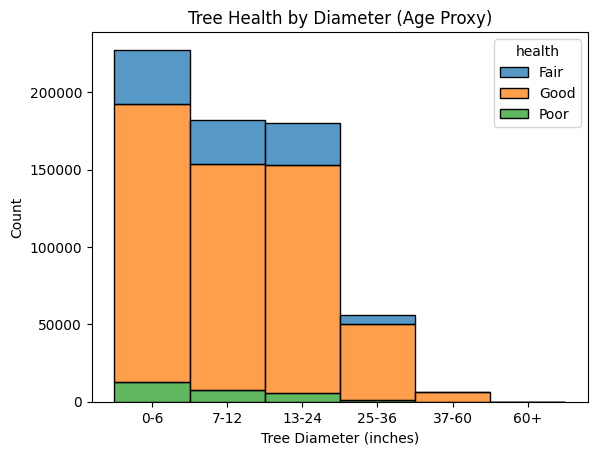

In [26]:
df_alive['dbh_bin'] = pd.cut(df_alive['tree_dbh'], bins=[0, 6, 12, 24, 36, 60, 100], labels=['0-6', '7-12', '13-24', '25-36', '37-60', '60+'])

# Health vs DBH Bin
sns.histplot(data=df_alive, x='dbh_bin', hue='health', multiple='stack')
plt.title('Tree Health by Diameter (Age Proxy)')
plt.xlabel('Tree Diameter (inches)')
plt.ylabel('Count')
plt.show()

1. Younger Trees (0–6") Are Most at Risk
    * Highest proportion of "Poor" and "Fair" health.
2. Mature Trees Are Generally Healthier
    * Trees in 13–36" range overwhelmingly exhibit "Good" health.
    * Trees over 36" DBH are rare but almost all are in good shape

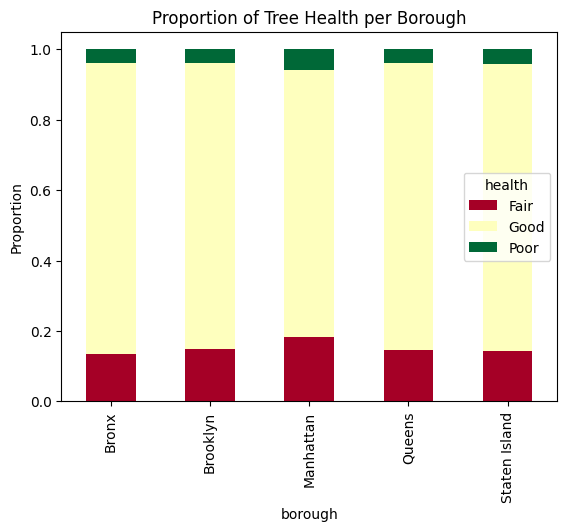

In [27]:
health_boro = (
    df_alive.groupby(['borough', 'health'])
    .size()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1)
)

health_boro.plot(kind='bar', stacked=True, colormap='RdYlGn')
plt.title('Proportion of Tree Health per Borough')
plt.ylabel('Proportion')
plt.show()

1. Manhattan Has the Lowest Tree Health
2. Staten Island & Queens Have the Healthiest Trees

C:\Users\IlyaPastushkov\AppData\Local\Temp\ipykernel_2664\876953893.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alive['problem_count'] = df_alive[problem_cols].apply(lambda row: sum(row == 'Yes'), axis=1)


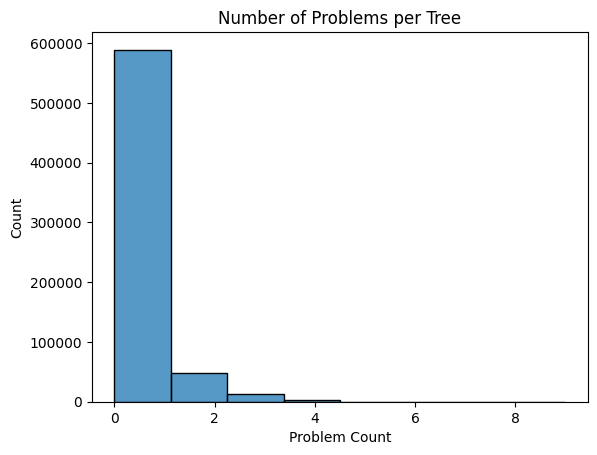

In [31]:
# Problem flags
problem_cols = ['root_stone', 'root_grate', 'root_other', 
                'trunk_wire', 'trnk_light', 'trnk_other', 
                'brch_light', 'brch_shoe', 'brch_other']

# Count problems per tree
df_alive['problem_count'] = df_alive[problem_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# Distribution
sns.histplot(df_alive['problem_count'], bins=8)
plt.title('Number of Problems per Tree')
plt.xlabel('Problem Count')
plt.show()

1. Most Trees Are Structurally Sound
    * Nearly 85–90% of living trees have no visible root, trunk, or branch problems.
2. Small Subset with Multiple Issues
    * Trees with 2+ problems are rare but likely very poor in condition.

In [46]:
# Trees needing maintenance
needs_maintenance = df_alive[df_alive['problem_count'] > 0]
print(f"{len(needs_maintenance)} trees need some form of maintenance.")

225844 trees need some form of maintenance.


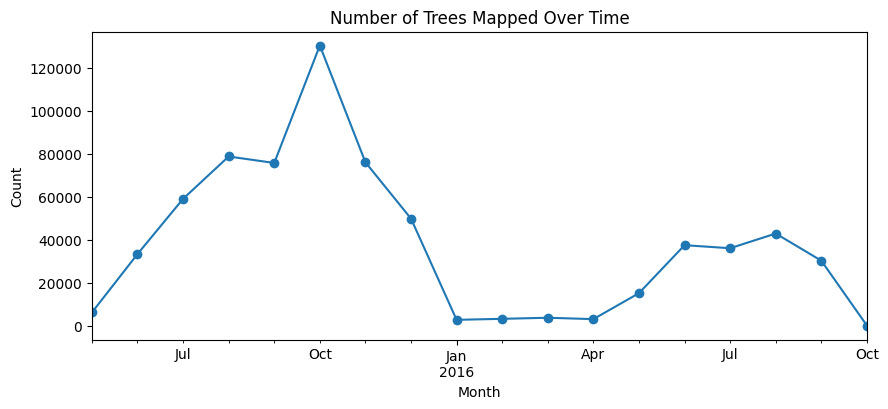

In [33]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['month'] = df['created_at'].dt.to_period('M')

tree_counts_by_month = df.groupby('month').size()
tree_counts_by_month.plot(kind='line', marker='o', figsize=(10, 4))
plt.title('Number of Trees Mapped Over Time')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

1. Peak mapping activity occurred around October 2015, with over 125,000 trees recorded.
2. Steady ramp-up from May to October 2015, reflecting active field collection season.
3. Sharp drop-off in winter months (Dec 2015 – Feb 2016) — near-zero activity.
4. Mild recovery and a second smaller bump during summer 2016 (June–August).
5. Activity declines again by fall 2016, nearly ending by October

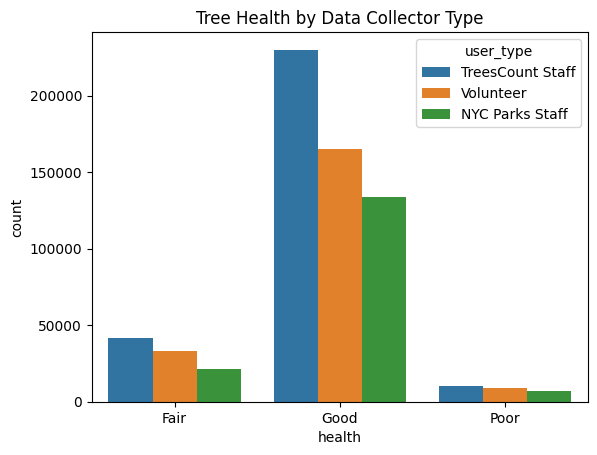

In [34]:
sns.countplot(data=df_alive, x='health', hue='user_type')
plt.title('Tree Health by Data Collector Type')
plt.show()

1. TreesCount Staff Logged the Most Trees
    * They may have been more active during peak census months or assigned to more blocks.
    * Also suggests they were efficient and consistent in data entry.
2. Health Ratings Are Similar Across Groups
    * All user types are relatively consistent in how they rate tree health.
    * No strong systematic bias (e.g., volunteers being overly optimistic or pessimistic).

In [35]:
nta_health = (
    df_alive.groupby(['nta_name', 'health']).size().unstack(fill_value=0)
)
nta_health['Total'] = nta_health.sum(axis=1)
nta_health['Poor %'] = (nta_health['Poor'] / nta_health['Total']).round(2)

top10_poor = nta_health.sort_values(by='Poor %', ascending=False).head(10)
print(top10_poor[['Poor %']])

health                                              Poor %
nta_name                                                  
Breezy Point-Belle Harbor-Rockaway Park-Broad C...    0.14
Hammels-Arverne-Edgemere                              0.14
Lenox Hill-Roosevelt Island                           0.10
Yorkville                                             0.09
Midtown-Midtown South                                 0.08
Ridgewood                                             0.08
Washington Heights South                              0.08
Murray Hill-Kips Bay                                  0.08
Marble Hill-Inwood                                    0.08
Brighton Beach                                        0.07


In [36]:
high_risk = df_alive[(df_alive['tree_dbh'] > 36) & (df_alive['problem_count'] >= 3)]
high_risk[['tree_dbh', 'borough', 'spc_common', 'problem_count']].head()

,tree_dbh,borough,spc_common,problem_count
483,38,Queens,honeylocust,3
5399,40,Staten Island,weeping willow,3
5627,38,Queens,London planetree,5
8642,39,Queens,London planetree,3
12103,39,Queens,pin oak,4


In [37]:
species_health = (
    df_alive.groupby(['borough', 'spc_common', 'health'])
    .size()
    .unstack(fill_value=0)
)

species_health['Total'] = species_health.sum(axis=1)
species_health['Good %'] = species_health['Good'] / species_health['Total']

# Filter top species in each borough
top_health = species_health[species_health['Total'] > 100].reset_index()
top_good_per_boro = top_health.sort_values(['borough', 'Good %'], ascending=[True, False]).groupby('borough').head(1)

top_good_per_boro[['borough', 'spc_common', 'Good %']]

health,borough,spc_common,Good %
30,Bronx,eastern redcedar,0.911392
76,Brooklyn,Japanese zelkova,0.872347
156,Manhattan,golden raintree,0.885794
202,Queens,arborvitae,0.914286
267,Staten Island,Chinese elm,0.915335
